In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None


In [15]:
df = pd.read_csv("boston_house_prices.csv")
df

,506,13,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21,391.99,9.67,22.4
503,0.04527,0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21,396.9,9.08,20.6
504,0.06076,0,11.93,0,0.573,6.976,91,2.1675,1,273,21,396.9,5.64,23.9
505,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21,393.45,6.48,22


In [16]:
df.columns=df.iloc[0]
df=df.drop(df.index[0])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21,391.99,9.67,22.4
503,0.04527,0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21,396.9,9.08,20.6
504,0.06076,0,11.93,0,0.573,6.976,91,2.1675,1,273,21,396.9,5.64,23.9
505,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21,393.45,6.48,22


In [36]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [28]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object', name=0)

In [31]:
df=df.apply(pd.to_numeric)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [41]:
df.rename(columns={'MEDV': 'Price'}, inplace=True)

In [42]:
df.PRICE

1      24.0
2      21.6
3      34.7
4      33.4
5      36.2
       ... 
502    22.4
503    20.6
504    23.9
505    22.0
506    11.9
Name: MEDV, Length: 506, dtype: float64

In [38]:
corr= df.corr()
corr.shape

(14, 14)

In [39]:
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='0', ylabel='0'>

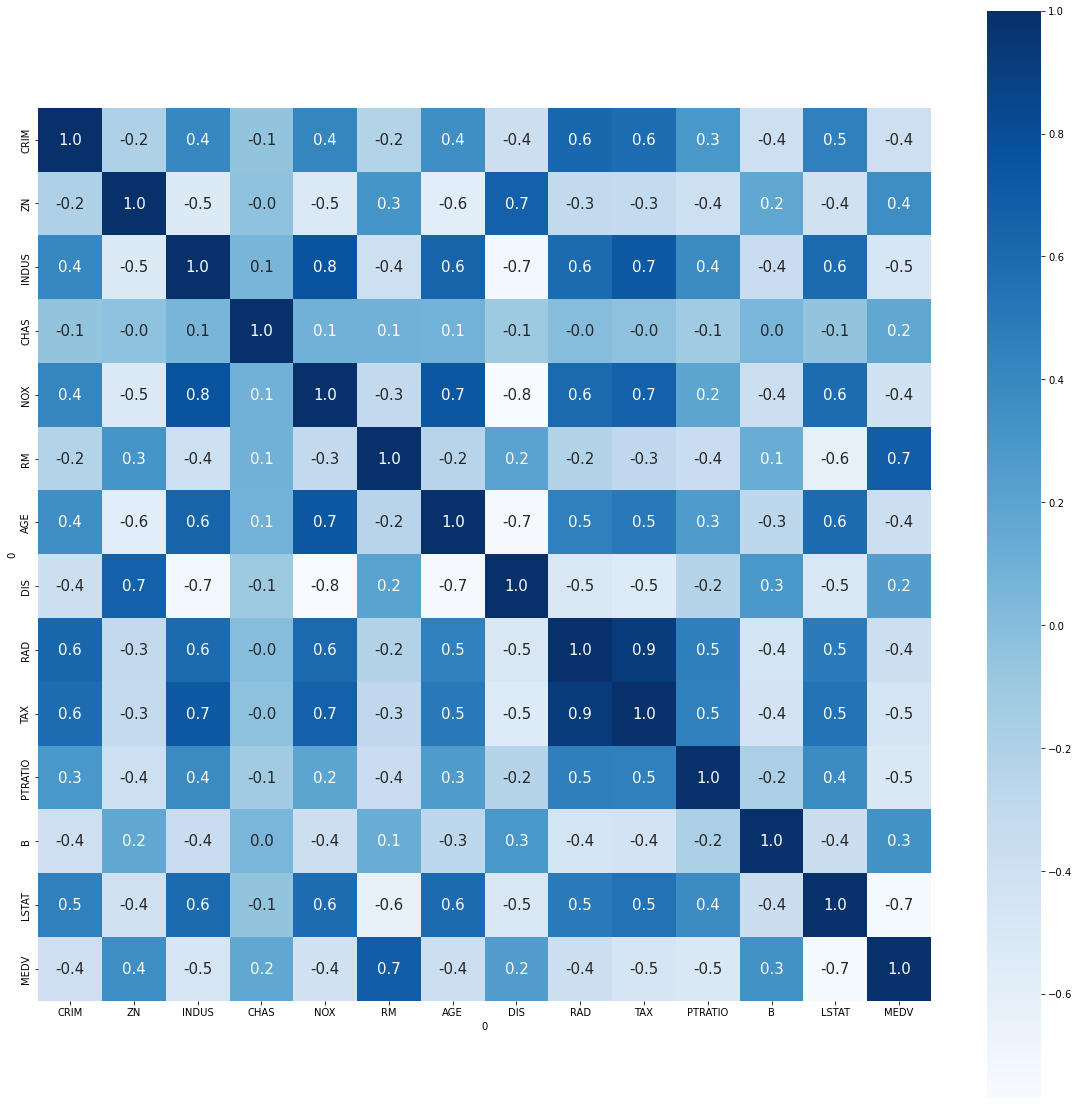

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,cbar=True, square=True,fmt='.1f', annot=True,annot_kws={'size':15},cmap="Blues")

In [44]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object', name=0)

In [45]:
X=df.drop(['Price'],axis =1)
y=df['Price']

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [47]:
from sklearn.linear_model import LinearRegression

In [49]:
lm=LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [50]:
lm.coef_

array([-1.53776087e-01,  6.50159270e-02, -2.42597326e-02,  1.62203309e+00,
       -1.52999306e+01,  3.35196668e+00,  1.13259963e-02, -1.54810871e+00,
        3.02641886e-01, -1.22317535e-02, -8.11539044e-01,  1.29504798e-02,
       -5.44861583e-01])

In [51]:
lm.intercept_

34.24483703390699

In [52]:
y_pred=lm.predict(X_train)

In [56]:
Rsquared=metrics.r2_score(y_train,y_pred)
MeanAbsoluteError=metrics.mean_absolute_error(y_train,y_pred)
MeansquaredError=metrics.mean_squared_error(y_train,y_pred)
RootMeanSquaredError=np.sqrt(metrics.mean_squared_error(y_train,y_pred))
print('R^2 :',Rsquared)
print('MAE :',MeanAbsoluteError)
print('MSE :',MeansquaredError)
print('RMSE :',RootMeanSquaredError)

R^2 : 0.7495400632086622
MAE : 3.089247538273406
MSE : 19.45968013480259
RMSE : 4.411312745068365


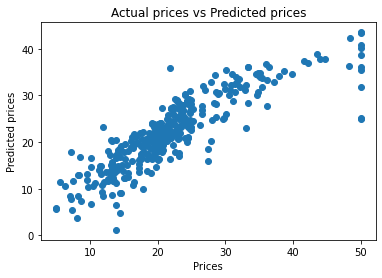

In [58]:
plt.scatter(y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

In [59]:
test_pred=lm.predict(X_test)

In [60]:
Rsquared_test=metrics.r2_score(y_test,test_pred)
MeanAbsoluteError_test=metrics.mean_absolute_error(y_test,test_pred)
MeansquaredError_test=metrics.mean_squared_error(y_test,test_pred)
RootMeanSquaredError_test=np.sqrt(metrics.mean_squared_error(y_test,test_pred))
print('R^2 :',Rsquared)
print('MAE :',MeanAbsoluteError)
print('MSE :',MeansquaredError)
print('RMSE :',RootMeanSquaredError)

R^2 : 0.7495400632086622
MAE : 3.089247538273406
MSE : 19.45968013480259
RMSE : 4.411312745068365
